# Classification House Grade Prediction

### ----------------------------------------------------------------------------------------------------------------------------------

##  Overview of House Grade Classification 
Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing
various houses into different grades based on various parameters. This would help agents in identifying
the type of house a customer is looking for. This way, the search for the house can be narrowed down
by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) — E (Worst) ) can also be used by existing
owners to list their properties for sale. Grading helps them in arriving at a price of the house.


## Business Objective
Build a predictive model to determine the Grade of house(The grade are A,B,C,D, and E).

## Technical Goals
Understand the data very well. Do all transformations / data engineering / etc. wherever applicable

Perform Exploratory Data Analysis (EDA)

Carry out all the Data mining tasks

Identify the salient features that will determine the best results

Perform the model evaluation to select the best algorithms

### ---------------------------------------------------------------------------------------------------------------------------------

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### Load the data

In [2]:
df=pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')

#### Insights from the data

In [3]:
#Checking first five records of data
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
# Checking last five records of data
df.tail()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B
2999,3000,343,7,6,6,8,NO,0,108,5,95,3,4105,C


####  Checking the structure of data

In [5]:
df.shape

(3000, 14)

#### Summarize the data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Area(total),3000.0,325.117000,20.507742,290.0,308.00,325.0,343.00,360.0
Trooms,3000.0,7.021667,1.421221,5.0,6.00,7.0,8.00,9.0
Nbedrooms,3000.0,5.023000,1.634838,2.0,4.00,5.0,6.00,8.0
Nbwashrooms,3000.0,4.513667,1.715263,1.0,3.00,4.0,6.00,8.0
Twashrooms,3000.0,6.010667,1.786136,2.0,5.00,6.0,7.00,10.0
Roof(Area),3000.0,48.980667,48.746641,0.0,0.00,71.0,96.00,120.0
Lawn(Area),3000.0,95.609333,14.837388,70.0,83.00,96.0,109.00,120.0
Nfloors,3000.0,4.013333,1.621532,1.0,3.00,4.0,5.00,7.0
API,3000.0,70.190667,17.563460,40.0,55.00,70.0,85.00,100.0


#### Checking info of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


#### Null value check

In [8]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### There is no null value in the data.

#### Checking dtypes of data.

In [9]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Exploratory Data Analysis

* 1) Which type of Houses(Grades) are sold more?

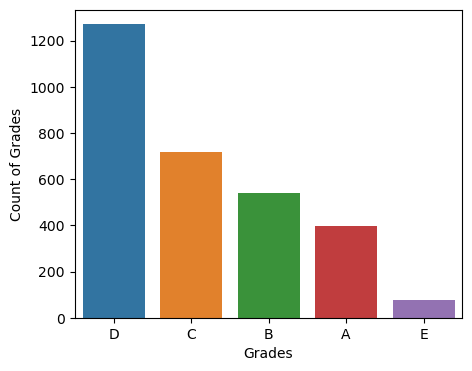

In [10]:
fig,ax=plt.subplots(figsize=(5,4))
sns.countplot(x=df.Grade)
plt.xlabel('Grades')
plt.ylabel('Count of Grades')
plt.show()

* From the above viz:
* D graded houses are owned more(Maximum)
* and E graded houses are less owned(minimum)
* Maximum number of customers are willing to have houses like D,C grades.

* 2)What type of BedRooms are purchasing more(2b,3b,4b,etc)?

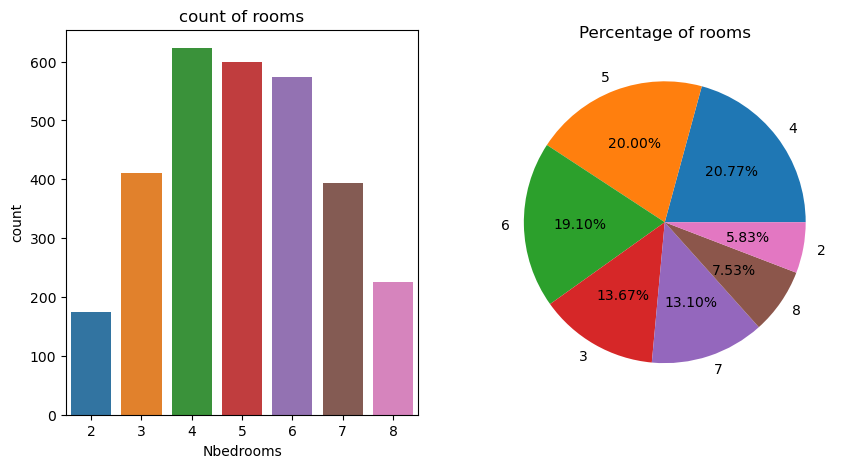

In [11]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('count of rooms')
ax[1].set_title('Percentage of rooms')
percentage=df['Nbedrooms'].value_counts()

sns.countplot(x=df['Nbedrooms'],ax=ax[0])
plt.pie(percentage,labels=percentage.index,autopct='%0.2f%%')
plt.show()

* From the above viz:
* Customers wise bedrooms, so most number of customers are having 4 and 5 bedroom houses.
* less number of customers are willing to buy 2 and 8 bedroom houses.

* 3)What types of bathrooms are purchasing more?

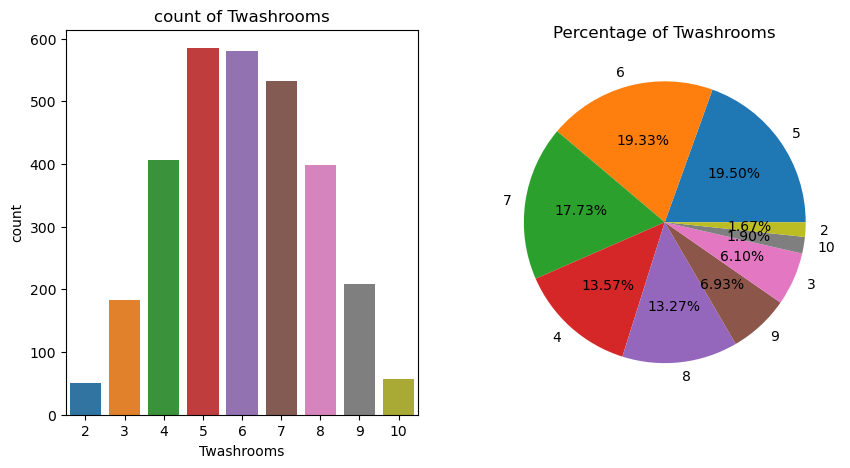

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('count of Twashrooms')
ax[1].set_title('Percentage of Twashrooms')
percentage=df['Twashrooms'].value_counts()

sns.countplot(x=df['Twashrooms'],ax=ax[0])
plt.pie(percentage,labels=percentage.index,autopct='%0.2f%%')
plt.show()

* From the above viz:
* Maximum number of customers are having 5,6 washrooms, so houses with 5,6 washrooms are sold more.
* and houses with 2,10 washrooms are sold less.

* 4)How much area is most likely purchasing by customers?

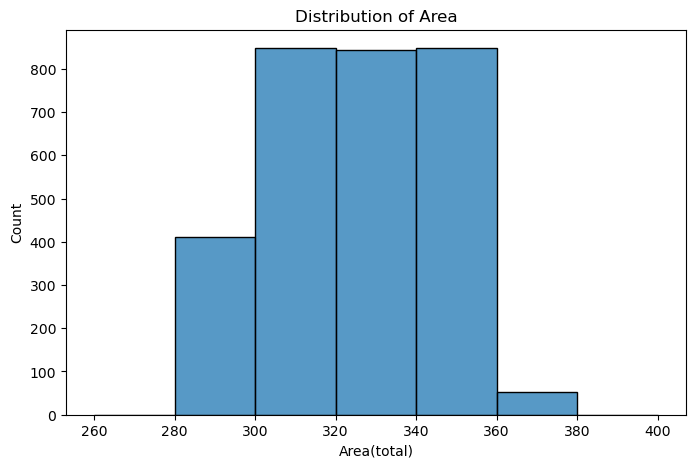

In [13]:
fig,ax=plt.subplots(figsize=(8,5))
bins=[260,280,300,320,340,360,380,400]
sns.histplot(df['Area(total)'],bins=bins,ax=ax)
ax.set_title('Distribution of Area')
plt.show()

* From the above viz distribution of customers withrespect to total area.
* Maximumn number of customers are distributed in the area of 300 to 360.
* very less customers are distributed with area of 360-380.

* 5)What is the distribution of Expected Price?

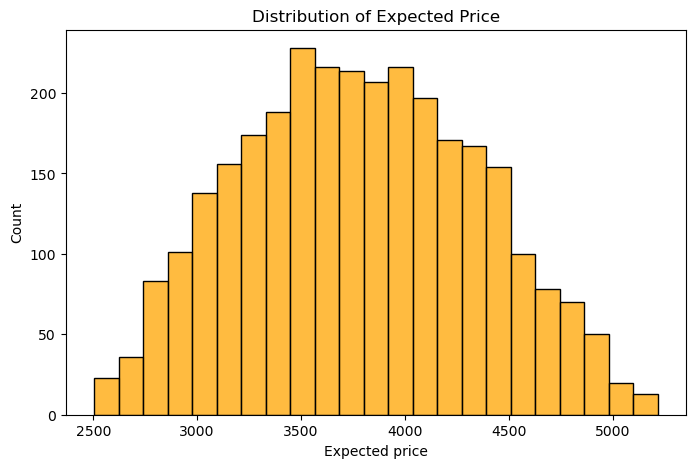

In [14]:
fig,ax=plt.subplots(figsize=(8,5))
sns.histplot(df['Expected price'],ax=ax,color='orange')
ax.set_title('Distribution of Expected Price')
plt.show()

* From the above viz is the distribution of Expected Price.
* Maximum number of customers are distributed between 3500 to 4000 price rate.
* There are less number of customer distributed below price rate of 3000 and above 5000.

* 6)What is the percentage of people likely to buy house with and without roof?

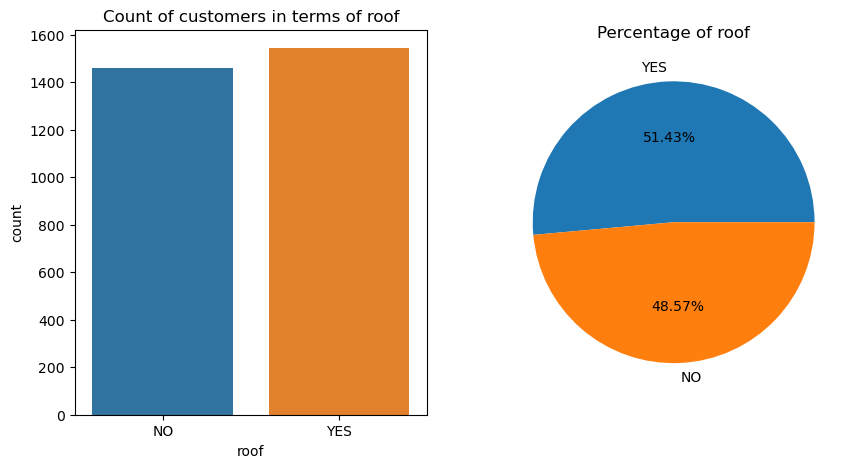

In [15]:
fig,ax=plt.subplots(1,2 ,figsize=(10,5))
ax[0].set_title('Count of customers in terms of roof')
ax[1].set_title('Percentage of roof')
percentage=df['roof'].value_counts()

sns.countplot(x=df['roof'],ax=ax[0])
plt.pie(percentage,labels=percentage.index,autopct='%0.2f%%')
plt.show()

* From the above viz which is customers count with and without roof.
* So my observation from the above charts,I think there is not much change in the sales of house with roof.

* 7) What is the relatiship of roof with Grade?

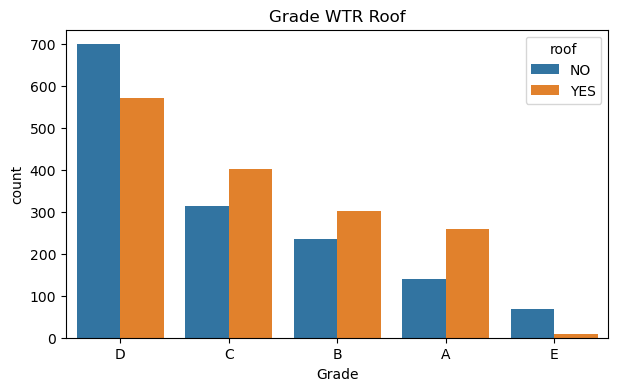

In [16]:
fig,ax=plt.subplots(figsize=(7,4))
sns.countplot(x='Grade',hue='roof',data=df)
ax.set_title('Grade WTR Roof')
plt.show()

### Simple Summary from EDA:

* Most selling types of houses in terms of grade are D and C.
* Houses with 4,5 bedrooms are maximum sold.
* Houses with 5,6 washrooms are maximum sold.
* Area of houses with 300 to 360 are maximum sold.
* And i think roof of the house is not effecting the sales of house.
* Maximum number of customers are distributed between expected price of 3500 to 4000.

#### Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
obj=df.select_dtypes(include='object')
for i in obj:
    df[i]=le.fit_transform(df[i])

#### Checking Correlation of features

In [19]:
cor=df.corr()
cor

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


#### Ploting heatmap

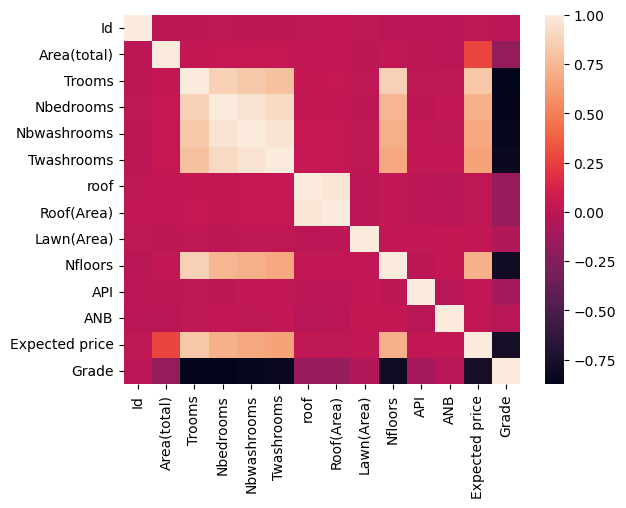

In [20]:
sns.heatmap(cor)
plt.show()

#### Feature selection

In [21]:
X=df.drop(columns='Grade',axis=1)
Y=df.Grade

#### Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [23]:
X=scaler.fit_transform(X)

### Model building using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split

In [25]:
Log_model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(Log_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.920


#### Summary of Logistic Regression :
* This is Baseline model Logistic Regression.
* The Accuracy of the model is 92% which is nothing but the over all performance of the model is excellent.
* We can use to model for predictions,but let's check for other models also.

### Model Building using Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
Naive_model = GaussianNB()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(Naive_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.802


#### Summary of Naive Bayes model :
* This is Naive bayes model.
* The Accuracy of model is 80% which is over all performance of the model is good.
* Lets check for other classification models.

### Model building using Decisiontree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
Decision_model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(Decision_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.841


#### Summary of Decision Tree classifier :
* This is Decision tree classifier.
* The accuracy of this model is nearly 84% which is nothing but overall performance of the model is better but not then Logistic regression.
* Let's check for other models.

### Random forest classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
RandomForest_model = RandomForestClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(RandomForest_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.899


#### Summary of Randomforest Classifier :
* This is RandomForest Classifier.
* The Accuracy of this model is nealy 90% which is nothing but the overall performance of the model is excellent.
* But Accuracy of the logistic regression is 90% ,little bit better then this model.

### Random forest using hyperparameters

In [32]:
RandomForest_Hyper = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                            n_estimators=100, oob_score=True)

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(RandomForest_Hyper,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.841


#### Summary of RandomForest classifer using Hyperparameters :
* Accuracy of this model is 84% which is nothing but the over all performance of the model.
* After tuning model with hyperparameter the performance of the model is decreasing.

### Hyper tuning for RandomForest using Gridsearchcv

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=22)

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [35]:
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
 n_jobs=-1, verbose=1, scoring="accuracy")

In [38]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 26.7 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [39]:
grid_search.best_score_

0.88

In [40]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

### Random forest using best estimators from GridSearchCv

In [41]:
rf_model=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=45)
n_scores = cross_val_score(rf_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1,
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.885


#### Summary of Randomforest Classifier using best estimators from GridSearchCV :
* In this model hyperparameters are used from best estimators GridSeachCV.
* Accuracy of this model is 88% which is nothing but the over all percentage of this model is best.
* But Logistic regression is obtained best Accuracy_score till now.

### Model building using Adaboost Classifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ada_model=AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=42)
n_scores = cross_val_score(ada_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1, 
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.605


#### Summary of AdaBoostClassifier :
* This is Adaboost classifier model.
* The accuracy of this model obtained is 60 % which nothing but overall performance of the model.
* Model is performing very poor.

### Model building using KNearestNeighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.115 at K = 13


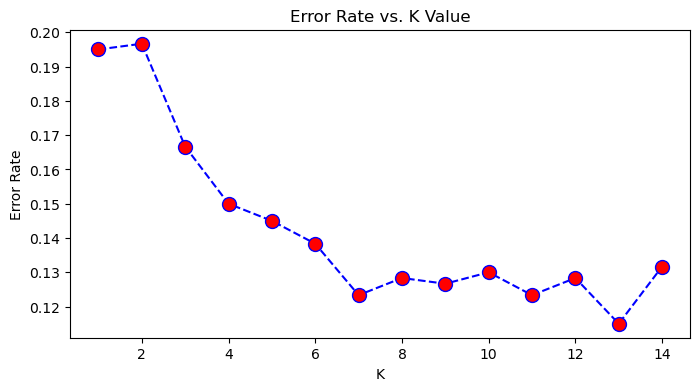

In [45]:
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(8,4))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [46]:
Knn_model=KNeighborsClassifier(n_neighbors=13)

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=42)
n_scores = cross_val_score(Knn_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1, 
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.873


#### Summary of KNN :
* This is KneighborClassifier model.
* Finding the best k value using error rate,and building the model with that.
* Accuracy of this model is 87% which is nothing but the over all performance of the model is better.

### Model building using Stacking

In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [48]:
def get_stacking():

    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [49]:
Stacking_model = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=4, random_state=42)
n_scores = cross_val_score(Stacking_model,X,Y, scoring='accuracy', cv=cv, n_jobs=-1, 
                           error_score='raise')

print('Accuracy_Score: %.3f' % np.mean(n_scores))

Accuracy_Score: 0.946


#### Summary of StackingClassifier :
* In this Stacking Regressor model, i have took many base regression algorithms like
    * 1) Logistic regression
    * 2) Decision tree classifier
    * 4) KNeighborClassifier
    * 5) SVC
    * 7) Stacking classifier with logistic regression as meta model
* And the Meta model is Logistic Regression.
* Coming to the performance of Stacking Classifier, evaluating model with accuracy , we got nearly 94.6% percentage which is best performance till now .
* So Stacking classifier is the best model.

### Making predictions using best models

* From all the model like
    * 1) Logistic regression
    * 2) Decision tree classifier
    * 3) Random forest classifier with hyperparameters
    * 4) Random forest classifier using best estimators from Gridsearchcv
    * 5) Adaboost classifier
    * 6) Knn classifier
    * 7) Stacking classifier with logistic regression as meta model
* Stacking is having more highest 'accuracy score' nearly 94.6 percentage.
* So now predicting the Grade using that best model.

In [50]:
model=Stacking_model.fit(x_train,y_train)

#### Score of best model in train and test dataset

In [51]:
print('Accuracy of the training dataset :',model.score(x_train,y_train))
print('Accuracy of the testing dataset :',model.score(x_test,y_test))

Accuracy of the training dataset : 0.9733333333333334
Accuracy of the testing dataset : 0.9566666666666667


In [52]:
y_pred=model.predict(x_test)
y_pred

array([3, 3, 3, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 3, 2, 3, 4, 2,
       2, 1, 4, 3, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 0, 2, 0, 3, 3, 1, 3, 3,
       0, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 1, 2, 3, 3,
       3, 2, 3, 1, 3, 1, 3, 3, 3, 0, 3, 2, 0, 3, 0, 0, 3, 3, 1, 2, 0, 0,
       1, 0, 1, 3, 2, 1, 0, 0, 3, 0, 3, 2, 4, 1, 2, 1, 3, 3, 0, 0, 2, 0,
       2, 3, 2, 3, 3, 1, 2, 0, 3, 1, 2, 2, 3, 1, 3, 3, 1, 2, 2, 1, 4, 1,
       2, 3, 3, 1, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 2, 1, 0, 3, 3, 3, 2, 2,
       3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 3,
       3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 1, 1, 0, 3, 3, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 2, 3, 1, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 2, 3, 1,
       0, 0, 2, 0, 3, 0, 2, 1, 3, 2, 3, 3, 2, 4, 3, 0, 3, 1, 3, 3, 2, 3,
       1, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 0, 0, 2, 2,
       2, 0, 2, 3, 3, 2, 2, 0, 0, 2, 3, 1, 3, 3, 3, 3, 2, 1, 3, 3, 2, 1,
       3, 2, 1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2,

#### Evaluating the best model(Stacking classifier)

In [53]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

#### Confusion matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[ 74,   4,   0,   0,   0],
       [  3, 108,   4,   0,   0],
       [  0,   1, 145,   9,   0],
       [  0,   0,   3, 237,   0],
       [  0,   0,   0,   2,  10]], dtype=int64)

#### Accuracy_Score

In [55]:
print('Accuracy_score :',accuracy_score(y_test,y_pred))

Accuracy_score : 0.9566666666666667


#### Precision_Score

In [56]:
print('Precision_score :',precision_score(y_test,y_pred,average='weighted'))

Precision_score : 0.9568153736679305


#### Recall_Score

In [57]:
print('Recall_score :',recall_score(y_test,y_pred,average='weighted'))

Recall_score : 0.9566666666666667


#### F1-Score

In [58]:
print('f1_score :',f1_score(y_test,y_pred,average='weighted'))

f1_score : 0.9564426181568202


### Summary:

* Main intention of this project is to build a best Classification model to predict the Grade of Houses.
* For building Classification model of this project, i have used some Classification algorithms like:
    * 1) Logistic regression
    * 2) Decision tree classifier
    * 3) Random forest classifier with hyperparameters
    * 4) Random forest classifier using best estimators from Gridsearchcv
    * 5) Adaboost classifier
    * 6) Knn classifier
    * 7) Stacking classifier with logistic regression as meta model
* Understanding data using data preprocessing and Exploratory Data Analysis.
* Best model is choosen from all the above models from their performance and which is evaluated by cross_val_score with 'accuracy' as scoring .
* `Stacking classifier with logistic regression as meta model is having the Highest accuracy_score of 94.6%, which is best comparatively to other models.`
* Building Best model with,by training and fitting to model.
* The Final scoring of my best model have improved very much.
* `Scoring of train dataset is nearly 97.3%.`
* `Scoring of test dataset is nearly 95.8%.`
* Made prediction using this best model.
* And evaluation of model using :
     * `Accuracy_Score = 95.83%`
     * `Precision_Score = 95.85%`
     * `Recall_Score = 95.83%`
     * `F1_Score = 95.81`
*` Finally, performace of the model is improved with accuracy of 94.6%,and Now this model is ready to use for the futher prediction of House Grades.`

### Conclusion : 

After conducting a comprehensive analysis of the provided dataset, a classification model was built to predict the grade of houses. The model building process involved using several classification algorithms, including logistic regression, decision tree classifier, random forest classifier with hyperparameters, random forest classifier using best estimators from Gridsearchcv, Adaboost classifier, KNN classifier, and Stacking classifier with logistic regression as a meta-model.

To evaluate the performance of these algorithms, cross_val_score was used with 'accuracy' as the scoring parameter. The results showed that the stacking classifier with logistic regression as a meta-model performed the best with an accuracy score of 94.6%.

To improve the model's performance, it was trained and fitted to the data. The model's scoring on the training dataset was found to be nearly 97.3%, indicating its ability to learn from the data. The performance on the test dataset was also impressive with an accuracy score of 95.8%.

The best model was then used to make predictions, and its performance was evaluated using different metrics such as accuracy score, precision score, recall score, and F1 score. The results showed that the model's performance was quite good, with an accuracy score of 95.83%.

In conclusion, a highly accurate classification model has been built to predict the grade of houses.This model can be used for further predictions of house grades with confidence, and it has the potential to assist in decision-making processes related to real estate investments, sales, and purchases.